In [2]:
import requests
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [3]:
# Download the XLSX file from the website
nl_name = ['tracker',
           'metadata',
           'pathways',
           'species']

tz_name = ['metabolite',
           'metadata',
           'pathways',
           'species']

nl_dict = {name: {} for name in nl_name}
tz_dict = {name: {} for name in tz_name}

for idx, name in enumerate(tz_name):
    url = f'https://raw.githubusercontent.com/ziyuw2/20.440_project/master/Data/tz_{name}.xlsx'
    response = requests.get(url)
    with open('source.xlsx', 'wb') as f:
        f.write(response.content)
    # Read the Excel file into a Pandas DataFrame
    source_exl = pd.read_excel('source.xlsx', sheet_name=None, engine='openpyxl')
    print(f'Data name: {name}')
    for sheet_name, content in source_exl.items():
        tz_dict[name][sheet_name] = content
        print(f'Sheets in the xlsx: {sheet_name}')

for idx, name in enumerate(nl_name):
    url = f'https://raw.githubusercontent.com/ziyuw2/20.440_project/master/Data/nl_{name}.xlsx'
    response = requests.get(url)
    with open('source.xlsx', 'wb') as f:
        f.write(response.content)
    # Read the Excel file into a Pandas DataFrame
    source_exl = pd.read_excel('source.xlsx', sheet_name=None, engine='openpyxl')
    print(f'Data name: {name}')
    for sheet_name, content in source_exl.items():
        nl_dict[name][sheet_name] = content
        print(f'Sheets in the xlsx: {sheet_name}')

Data name: metabolite
Sheets in the xlsx: metabolite
Sheets in the xlsx: metadata
Data name: metadata
Sheets in the xlsx: all
Sheets in the xlsx: diet
Data name: pathways
Sheets in the xlsx: pathways
Sheets in the xlsx: metadata
Data name: species
Sheets in the xlsx: species
Sheets in the xlsx: species_lm
Sheets in the xlsx: metadata_lm
Data name: tracker
Sheets in the xlsx: tracker
Data name: metadata
Sheets in the xlsx: metadata
Data name: pathways
Sheets in the xlsx: pathways
Sheets in the xlsx: metadata
Data name: species
Sheets in the xlsx: species
Sheets in the xlsx: metadata


In [4]:
url = f'https://raw.githubusercontent.com/ziyuw2/20.440_project/master/Data/41467_2021_25213_MOESM19_ESM.xlsx'
response = requests.get(url)
with open('source.xlsx', 'wb') as f:
    f.write(response.content)
source_exl = pd.read_excel('source.xlsx', sheet_name=None, engine='openpyxl')
# Loop over each sheet in the Excel file to save each sheet into a dict file
source_dict = {}
for sheet_name, content in source_exl.items():
    # Save the sheet data as a CSV file
    clean_sheet_name = sheet_name.replace("Fig", "").replace(".", "").replace(" ", "").replace(",", "_")
    print(clean_sheet_name)
    content.to_csv(f'{sheet_name}.csv', index=False)
    df = pd.read_csv(f'{sheet_name}.csv')
    source_dict[clean_sheet_name] = df

1a
1b
1c
1d
1e
1f
1g
2a
2b
2c
2d
2e
2f
3a
3b
3c
3d
3e
4a
4b
4c
4d_e
5a_c
5b
5d
5e
6


In [1]:
tz_diet = pd.merge(tz_dict['metadata']['diet'], tz_dict['metadata']['all'][['ID','Residency_Area']], on='ID', how='left')

NameError: ignored

(array([ 2.,  2.,  0.,  1.,  0.,  4.,  0.,  0.,  0.,  3.,  8.,  0.,  7.,
         0.,  8.,  0., 14.,  0.,  7.,  0., 11., 22.,  0., 16.,  0., 22.,
         0., 14.,  0., 16., 19.,  0., 13.,  0., 17.,  0., 24.,  0., 23.,
         0., 17., 10.,  0.,  4.,  0.,  8.,  0.,  8.,  0., 10.,  2.,  0.,
         4.,  0.,  3.,  0.,  0.,  0.,  2.,  2.]),
 array([11.  , 11.55, 12.1 , 12.65, 13.2 , 13.75, 14.3 , 14.85, 15.4 ,
        15.95, 16.5 , 17.05, 17.6 , 18.15, 18.7 , 19.25, 19.8 , 20.35,
        20.9 , 21.45, 22.  , 22.55, 23.1 , 23.65, 24.2 , 24.75, 25.3 ,
        25.85, 26.4 , 26.95, 27.5 , 28.05, 28.6 , 29.15, 29.7 , 30.25,
        30.8 , 31.35, 31.9 , 32.45, 33.  , 33.55, 34.1 , 34.65, 35.2 ,
        35.75, 36.3 , 36.85, 37.4 , 37.95, 38.5 , 39.05, 39.6 , 40.15,
        40.7 , 41.25, 41.8 , 42.35, 42.9 , 43.45, 44.  ]),
 <BarContainer object of 60 artists>)

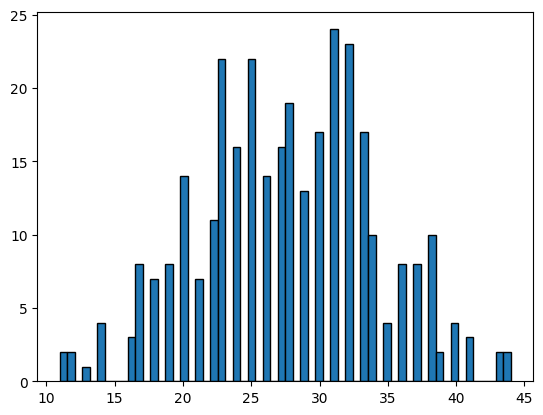

In [ ]:
plt.hist(tz_dict['metadata']['diet']['total fiber'], color = 'tab:blue', edgecolor = 'black', bins=60)
fiber_cutoff = 27

In [6]:
species_fiber = pd.merge(tz_dict['species']['species_lm'], tz_dict['metadata']['diet'][['ID','total fiber','exc rice']], on='ID', how='left')
species_fiber = pd.merge(species_fiber, tz_dict['metadata']['all'][['ID','Residency_Area']], on='ID', how='left')

In [16]:
urban =  species_fiber[species_fiber['Residency_Area'] == 'Urban']
am_present_urban = urban[urban['Akkermansia.muciniphila'] > 5]
am_notpresent_urban = urban[urban['Akkermansia.muciniphila'] == 0]

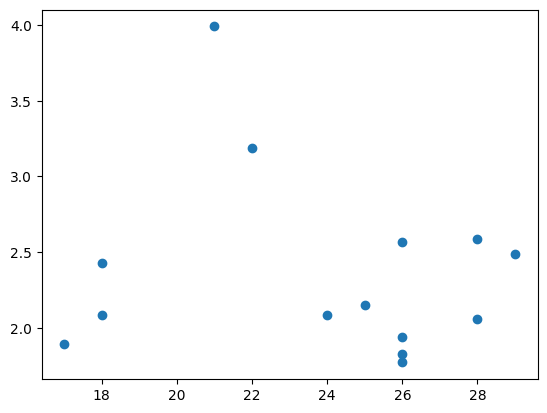

In [18]:
plt.scatter(am_present_urban['exc rice'], np.log(am_present_urban['Akkermansia.muciniphila']))

<Axes: xlabel='total fiber', ylabel='Count'>

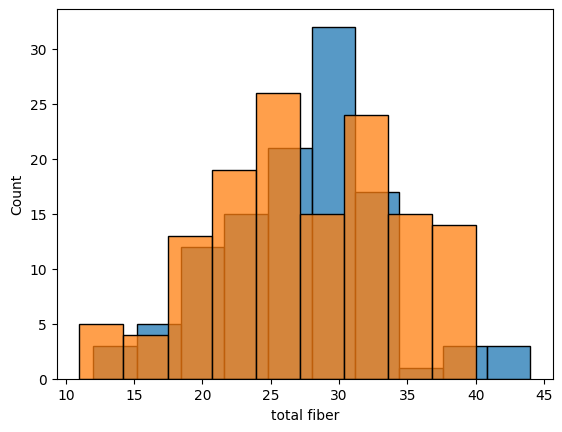

In [ ]:
sns.histplot(am_present_urban['total fiber'], label='A. muciniphila presents')
sns.histplot(am_notpresent_urban['total fiber'], label='A. muciniphila not present')

In [ ]:
rural =  species_fiber[species_fiber['Residency_Area'] == 'Rural']
am_present_rural = rural[rural['Akkermansia.muciniphila'] != 0]
am_notpresent_rural = rural[rural['Akkermansia.muciniphila'] == 0]

<Axes: xlabel='total fiber', ylabel='Count'>

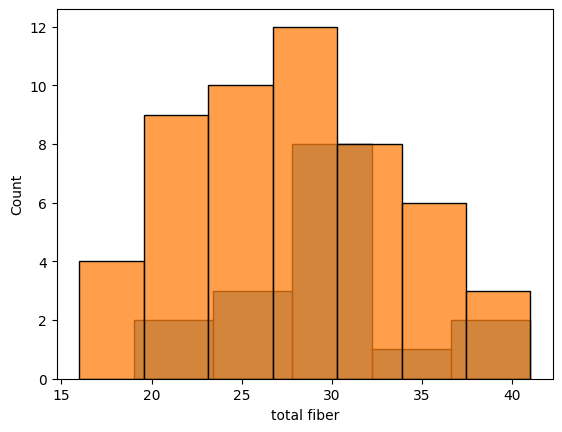

In [ ]:
sns.histplot(am_present_rural['total fiber'], label='A. muciniphila presents')
sns.histplot(am_notpresent_rural['total fiber'], label='A. muciniphila not present')

In [ ]:
am_present = species_fiber[species_fiber['Akkermansia.muciniphila'] != 0]
am_notpresent = species_fiber[species_fiber['Akkermansia.muciniphila'] == 0]

<Axes: xlabel='total fiber', ylabel='Count'>

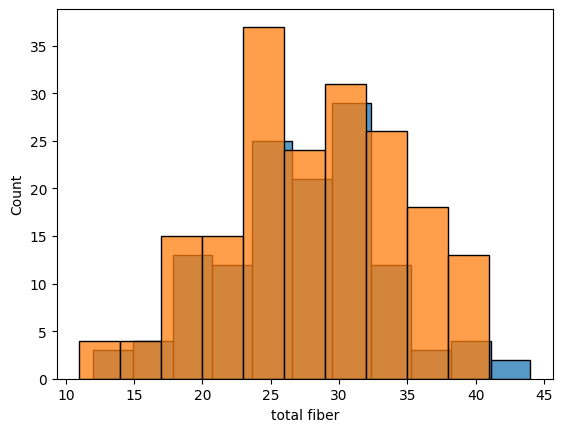

In [ ]:
sns.histplot(am_present['total fiber'], label='A. muciniphila present')
sns.histplot(am_notpresent['total fiber'], label='A. muciniphila not present')

<Axes: xlabel='total fiber', ylabel='Count'>

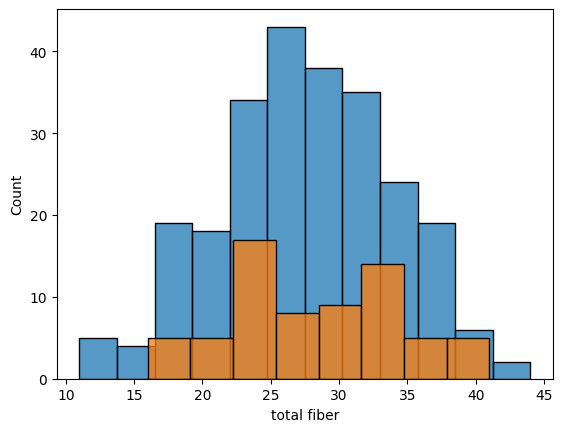

In [ ]:
sns.histplot(urban['total fiber'], label='urban fiber')
sns.histplot(rural['total fiber'], label='rural fiber')

<Axes: xlabel='exc rice', ylabel='Count'>

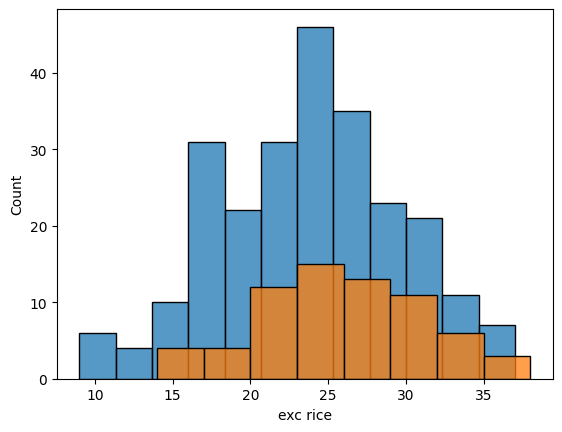

In [ ]:
sns.histplot(urban['exc rice'], label='urban fiber')
sns.histplot(rural['exc rice'], label='rural fiber')

<Axes: xlabel='Bifidobacterium.longum', ylabel='Count'>

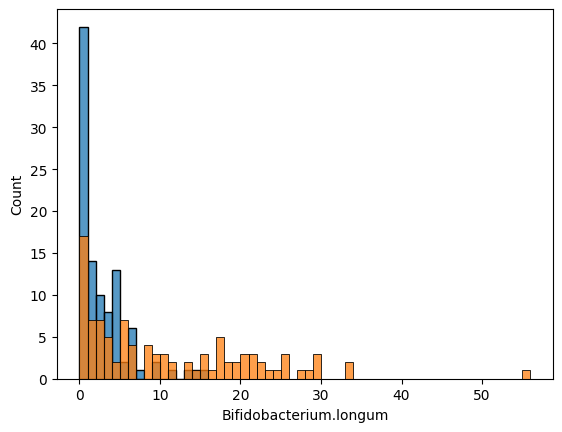

In [ ]:
bl_present = am_present[am_present['Bifidobacterium.longum'] != 0]
pc_present = am_present[am_present['Prevotella.copri'] != 0]
# sns.histplot(am_present['Akkermansia.muciniphila'], label='present')
sns.histplot(bl_present['Bifidobacterium.longum'], label='present', binwidth=1)
sns.histplot(pc_present['Prevotella.copri'], label='present', binwidth=1)


<Axes: xlabel='Bifidobacterium.longum', ylabel='Count'>

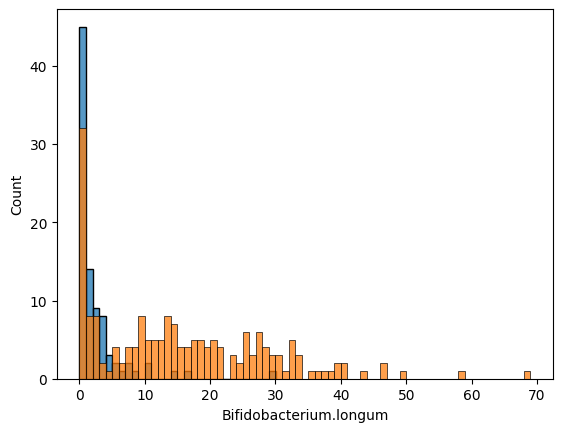

In [ ]:
# sns.histplot(am_present['Akkermansia.muciniphila'], label='present')
bl_presence = am_notpresent[am_notpresent['Bifidobacterium.longum'] != 0]
pc_present = am_notpresent[am_notpresent['Prevotella.copri'] != 0]

sns.histplot(bl_presence['Bifidobacterium.longum'], label='not present', binwidth=1)
sns.histplot(am_notpresent['Prevotella.copri'], label='not present', binwidth=1)


In [ ]:
display(am_present)

,ID,Bifidobacterium.longum,Lachnospiraceae.bacterium.3.1.46FAA,Bilophila.wadsworthia,Klebsiella.pneumoniae,Collinsella.aerofaciens,Oscillibacter.unclassified,Roseburia.unclassified,Roseburia.inulinivorans,Bilophila.unclassified,...,Ruminococcus.champanellensis,Prevotella.copri,Roseburia.intestinalis,Bacteroidales.bacterium.ph8,Bifidobacterium.adolescentis,Bacteroides.uniformis,Anaerostipes.hadrus,total fiber,exc rice,Residency_Area
0,TZFG001,4.06084,0.00000,0.05603,0.00000,2.47449,0.84679,0.13292,0.55244,0.57839,...,0.00000,0.00000,2.35848,0.44830,0.00000,0.83795,0.00000,43,36,Urban
1,TZFG002,0.34514,1.32769,0.00000,0.00000,1.13223,0.01738,0.00000,3.10060,0.02191,...,0.00000,21.06489,0.50356,0.02325,0.00000,0.53836,0.00427,14,11,Urban
2,TZFG003,1.40806,0.00000,0.03861,0.00000,0.00000,0.25780,0.00000,0.16044,0.56660,...,0.00000,0.00000,0.00000,0.00000,0.00000,20.57536,0.00293,31,28,Urban
4,TZFG005,1.59531,0.03592,0.00414,0.00000,1.41683,0.02503,0.00000,0.00000,0.08249,...,0.00000,33.03157,0.00000,0.00000,0.00000,0.63092,0.00590,29,27,Urban
5,TZFG006,15.22878,0.00000,0.08924,0.15681,2.13820,2.22339,0.00000,0.27012,0.25776,...,0.00000,5.63898,0.00000,0.00000,0.00000,0.36685,0.00288,29,24,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,TZFG298,0.00000,0.01398,0.00796,0.00000,2.25039,0.04436,0.00000,2.16992,0.13503,...,0.00000,2.62807,0.32031,0.00000,0.36593,0.01478,0.00000,31,30,Urban
294,TZFG300,4.97009,0.00000,0.00000,0.25332,1.06432,0.00000,0.00000,1.14681,0.01052,...,0.01872,0.15723,0.58736,0.00323,0.09944,0.23560,0.28943,33,30,Rural
299,TZFG305,0.21727,0.00000,0.00000,1.65278,1.34686,0.00235,0.00000,3.70967,0.09612,...,0.00000,20.77564,7.31142,0.01651,0.00000,0.19522,0.00351,24,24,Rural
303,TZFG309,0.02443,0.00539,0.00459,0.13067,0.09720,0.02166,0.00000,2.22270,0.07823,...,2.46934,0.00000,0.16202,0.00000,0.00000,4.56970,0.02792,26,25,Urban


In [ ]:
species_nl = nl_dict['species']['species']
display(species_nl)

,row,Methanobrevibacter smithii,Methanobrevibacter unclassified,Methanosphaera stadtmanae,Actinomyces graevenitzii,Actinomyces massiliensis,Actinomyces odontolyticus,Actinomyces oris,Actinomyces turicensis,Actinomyces viscosus,...,Bilophila unclassified,Bilophila wadsworthia,Desulfovibrio desulfuricans,Desulfovibrio piger,Escherichia coli,Escherichia unclassified,Haemophilus parainfluenzae,Akkermansia muciniphila,C2likevirus unclassified,Lactococcus phage P680
0,HV001,2.65525,0.01504,0.47176,0.00000,0.0,0.00000,0.0,0.00000,0.0,...,0.01890,0.00000,0.07177,0.17546,0.00000,0.00000,0.00219,2.03912,0.0,0.0
1,HV002,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.0,...,0.30658,0.02038,0.00000,0.00000,0.00000,0.01688,0.00000,2.23418,0.0,0.0
2,HV003,0.97602,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.0,...,0.24432,0.00228,0.00000,0.00000,0.08777,0.00000,0.18660,0.00000,0.0,0.0
3,HV004,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02346,0.00000,0.0,0.0
4,HV005,0.33514,0.16746,0.00000,0.00000,0.0,0.00104,0.0,0.02171,0.0,...,0.00189,0.00000,0.00000,0.00000,3.13000,0.21137,0.03662,0.07411,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,HV530,3.60650,0.34545,0.00000,0.00000,0.0,0.00391,0.0,0.00000,0.0,...,0.15900,0.00000,0.01320,0.06775,0.00000,0.01166,0.00000,2.28874,0.0,0.0
467,HV531,0.00000,0.00000,0.00000,0.00000,0.0,0.06036,0.0,0.00000,0.0,...,0.00000,0.00000,0.00000,0.00000,0.05423,0.00128,0.10995,3.94310,0.0,0.0
468,HV532,0.04196,0.01801,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.0,...,0.05579,0.00361,0.00000,0.00000,0.00000,0.00597,0.00053,0.02654,0.0,0.0
469,HV533,9.51354,2.45516,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.0,...,0.18580,0.01169,0.00000,0.00000,0.47272,0.04759,0.10185,0.09883,0.0,0.0


In [ ]:
am_present_nl = species_nl[species_nl['Akkermansia muciniphila'] != 0]
am_notpresent_nl = species_nl[species_nl['Akkermansia muciniphila'] == 0]

<Axes: xlabel='Akkermansia muciniphila', ylabel='Count'>

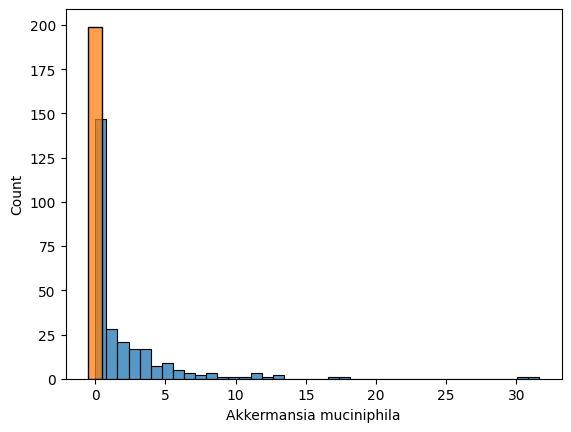

In [ ]:
sns.histplot(am_present_nl['Akkermansia muciniphila'], label='nl am')
sns.histplot(am_notpresent_nl['Akkermansia muciniphila'], label='not present')

In [ ]:
temp_df = source_dict['1c'].copy()
temp_df.rename(columns={'Sample': 'PID'}, inplace=True)
display(temp_df)

,PID,Cohort,Gender,Age,Reads,Markers,Genes,Cluster,Residency,Label,Log10Markers,MDS1,MDS2,TSNE1,TSNE2
0,HV001,NL,Male,27.000000,8135158.0,211643.0,263494.0,NaN,NaN,NL,"(4.95,5.33]",-0.042320,-0.086724,15.226276,-0.137869
1,HV002,NL,Male,26.000000,9051284.0,507239.0,201067.0,NaN,NaN,NL,"(5.7,6.08]",-0.099365,-0.041610,-7.668209,1.800409
2,HV003,NL,Female,24.000000,9281854.0,450897.0,206529.0,NaN,NaN,NL,"(5.33,5.7]",-0.228056,0.100322,-8.331373,12.369550
3,HV004,NL,Female,20.000000,13014979.0,652248.0,200244.0,NaN,NaN,NL,"(5.7,6.08]",-0.120803,0.054894,-8.406149,2.306940
4,HV005,NL,Female,22.000000,10015416.0,342633.0,214428.0,NaN,NaN,NL,"(5.33,5.7]",0.136042,-0.067075,7.515303,-10.286087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,TZFG316,TZ,Male,32.027379,NaN,NaN,NaN,2.0,Rural,TZ Rural,NaN,0.232198,-0.041192,4.344584,-17.062052
782,TZFG317,TZ,Male,46.428474,NaN,NaN,NaN,3.0,Rural,TZ Rural,NaN,0.273511,0.158296,-6.165774,-14.041771
783,TZFG318,TZ,Male,37.067762,NaN,NaN,NaN,3.0,Urban,TZ Urban,NaN,0.255344,0.190366,-10.646050,-14.090726
784,TZFG319,TZ,Male,36.969199,NaN,NaN,NaN,2.0,Rural,TZ Rural,NaN,0.116084,-0.105838,10.381762,-9.645968


In [ ]:
species_hostinfo = pd.DataFrame({'PID': source_dict['1e']['Sample'], 
                                 'Bacteria': source_dict['1e']['Feature'], 
                                 'Abundance': source_dict['1e']['Rank']})

In [ ]:
display(species_hostinfo)

,PID,Bacteria,Abundance
0,HV001,Bifidobacterium longum,520
1,HV002,Bifidobacterium longum,445
2,HV003,Bifidobacterium longum,723
3,HV004,Bifidobacterium longum,314
4,HV005,Bifidobacterium longum,231
...,...,...,...
6283,TZFG316,Bacteroides dorei,0
6284,TZFG317,Bacteroides dorei,0
6285,TZFG318,Bacteroides dorei,660
6286,TZFG319,Bacteroides dorei,0


In [ ]:
species_hostinfo = species_hostinfo.merge(temp_df[['Age','PID', 'Gender', 'Label']], on='PID', how='left')

In [ ]:
nl_species = species_hostinfo[species_hostinfo['Label'] == 'NL']
nl_am_present = nl

In [ ]:
blongum_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Bifidobacterium longum']
amuciniphila_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Akkermansia muciniphila']
ou_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Oscillibacter uncl.']
af_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Alistipes finegoldii']
pc_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Prevotella copri']
su_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Subdoligranulum uncl.']
eb_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Eubacterium biforme']
bd_hostinfo = species_hostinfo[species_hostinfo['Bacteria'] == 'Bacteroides dorei']

In [ ]:
display(blongum_hostinfo)

,PID,Bacteria,Abundance,Age,Gender,Label
0,HV001,Bifidobacterium longum,520,27.000000,Male,NL
1,HV002,Bifidobacterium longum,445,26.000000,Male,NL
2,HV003,Bifidobacterium longum,723,24.000000,Female,NL
3,HV004,Bifidobacterium longum,314,20.000000,Female,NL
4,HV005,Bifidobacterium longum,231,22.000000,Female,NL
...,...,...,...,...,...,...
781,TZFG316,Bifidobacterium longum,0,32.027379,Male,TZ Rural
782,TZFG317,Bifidobacterium longum,0,46.428474,Male,TZ Rural
783,TZFG318,Bifidobacterium longum,0,37.067762,Male,TZ Urban
784,TZFG319,Bifidobacterium longum,0,36.969199,Male,TZ Rural


In [ ]:
blongum_nl = blongum_hostinfo[blongum_hostinfo['Label'] == 'NL '].sort_values(by='Abundance', ascending=True).reset_index(drop=True)
blongum_rr = blongum_hostinfo[blongum_hostinfo['Label'] == 'TZ Rural'].sort_values(by='Abundance', ascending=True).reset_index(drop=True)
blongum_ub = blongum_hostinfo[blongum_hostinfo['Label'] == 'TZ Urban'].sort_values(by='Abundance', ascending=True).reset_index(drop=True)

In [ ]:
blongum_sorted = blongum_hostinfo.sort_values(by='Abundance', ascending=True).reset_index(drop=True)
# print(blongum_nl['Abundance'].rank(ascending=True))

In [ ]:
display(blongum_nl)

,PID,Bacteria,Abundance,Age,Gender,Label
0,HV063,Bifidobacterium longum,0,23.0,Male,NL
1,HV347,Bifidobacterium longum,0,21.0,Female,NL
2,HV030,Bifidobacterium longum,0,25.0,Female,NL
3,HV416,Bifidobacterium longum,0,26.0,Male,NL
4,HV129,Bifidobacterium longum,0,26.0,Male,NL
...,...,...,...,...,...,...
466,HV226,Bifidobacterium longum,780,24.0,Male,NL
467,HV309,Bifidobacterium longum,781,48.0,Male,NL
468,HV470,Bifidobacterium longum,782,22.0,Male,NL
469,HV455,Bifidobacterium longum,783,26.0,Female,NL


In [ ]:
(np.arange(len(blongum_nl))+1)/len(blongum_nl)

In [ ]:
blongum_nl['Abundance']

0      520
1      445
2      723
3      314
4      231
      ... 
466    305
467    138
468    472
469    505
470    510
Name: Abundance, Length: 471, dtype: int64

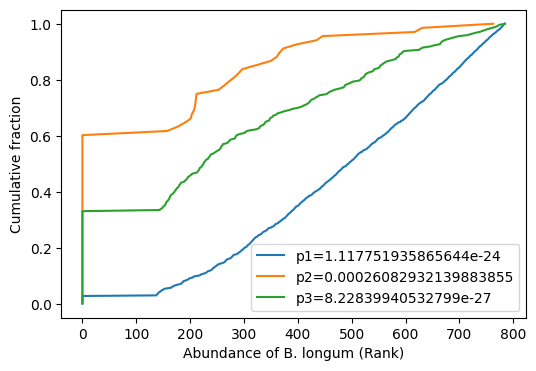

In [ ]:
p1 = sp.stats.ks_2samp(blongum_nl['Abundance'], blongum_rr['Abundance'], alternative='two-sided', method='auto')
p2 = sp.stats.ks_2samp(blongum_ub['Abundance'], blongum_rr['Abundance'], alternative='two-sided', method='auto')
p3 = sp.stats.ks_2samp(blongum_ub['Abundance'], blongum_nl['Abundance'], alternative='two-sided', method='auto')
fig = plt.figure(figsize=(6,4))
plt.plot(blongum_nl['Abundance'], (np.arange(len(blongum_nl))+1)/len(blongum_nl), label=f'p1={p1.pvalue}')
plt.plot(blongum_rr['Abundance'], (np.arange(len(blongum_rr))+1)/len(blongum_rr), label =f'p2={p2.pvalue}')
plt.plot(blongum_ub['Abundance'], (np.arange(len(blongum_ub))+1)/len(blongum_ub), label=f'p3={p3.pvalue}')
plt.legend()
plt.xlabel('Abundance of B. longum (Rank)')
plt.ylabel('Cumulative fraction')
# plt.title('Gut B. longum Abundance in Different Populations')
fig.savefig('blongum_abundance_populations.png')

In [ ]:
p1 = sp.stats.ks_2samp(blongum_nl['Abundance'], blongum_rr['Abundance'], alternative='two-sided', method='auto')
p2 = sp.stats.ks_2samp(blongum_ub['Abundance'], blongum_rr['Abundance'], alternative='two-sided', method='auto')
p3 = sp.stats.ks_2samp(blongum_ub['Abundance'], blongum_nl['Abundance'], alternative='two-sided', method='auto')

In [ ]:
p2.pvalue

0.00026082932139883855

In [ ]:
p1
p3

KstestResult(statistic=0.42489491735217516, pvalue=8.22839940532799e-27, statistic_location=287, statistic_sign=1)

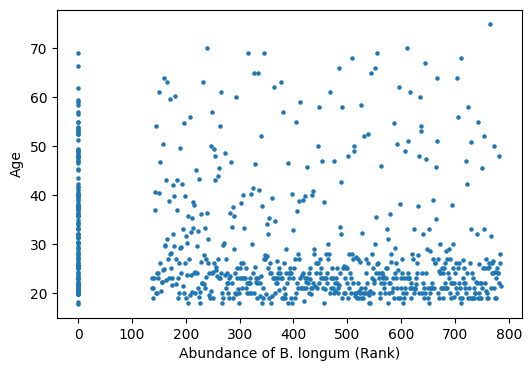

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.scatter(blongum_hostinfo['Abundance'], blongum_hostinfo['Age'], s=5)
plt.xlabel('Abundance of B. longum (Rank)')
plt.ylabel('Age')
# plt.title('Gut B. longum Abundance in Different Age Groups')
fig.savefig('blongum_abundance_age.png')

Text(0, 0.5, 'Abundance of A. muciniphila (Rank)')

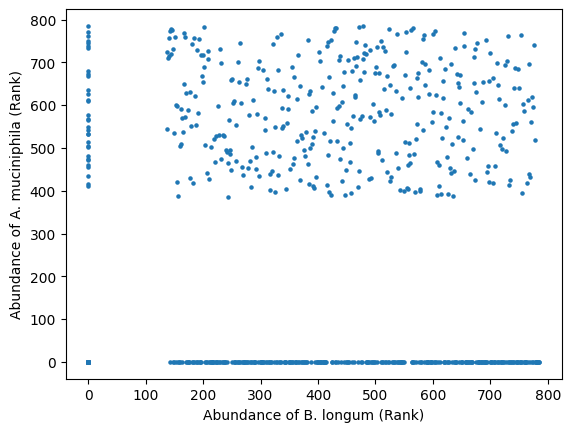

In [ ]:
plt.scatter(blongum_hostinfo['Abundance'], amuciniphila_hostinfo['Abundance'], s=5)
plt.xlabel('Abundance of B. longum (Rank)')
plt.ylabel('Abundance of A. muciniphila (Rank)')
# plt.title('Gut B. longum Abundance in Different Age Groups')

Text(0, 0.5, 'Abundance of P. copri (Rank)')

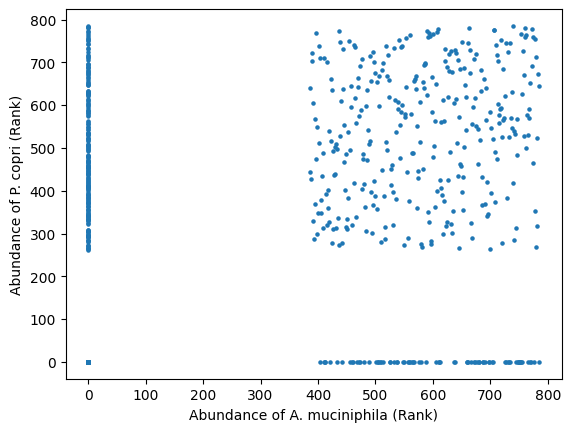

In [ ]:
plt.scatter(amuciniphila_hostinfo['Abundance'], af_hostinfo['Abundance'], s=5)
plt.xlabel('Abundance of A. muciniphila (Rank)')
plt.ylabel('Abundance of P. copri (Rank)')

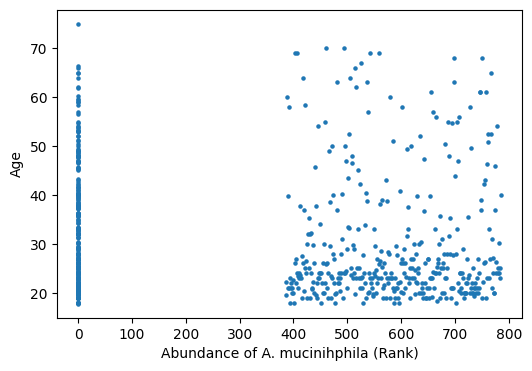

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.scatter(amuciniphila_hostinfo['Abundance'], amuciniphila_hostinfo['Age'], s=5)
plt.xlabel('Abundance of A. mucinihphila (Rank)')
plt.ylabel('Age')
# plt.title('Gut A. muciniphila Abundance in Different Age Groups')
fig.savefig('amucinihphila_abundance_age.png')

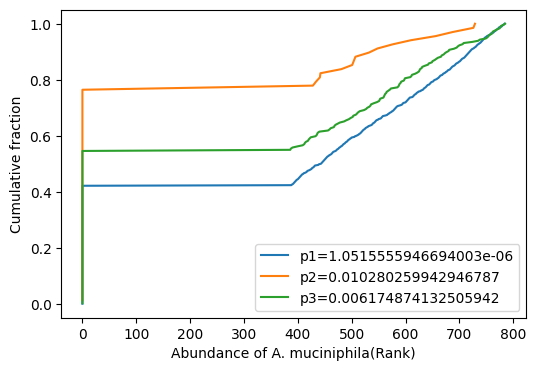

In [ ]:
amu_nl = amuciniphila_hostinfo[amuciniphila_hostinfo['Label'] == 'NL '].sort_values(by='Abundance', ascending=True).reset_index(drop=True)
amu_rr = amuciniphila_hostinfo[amuciniphila_hostinfo['Label'] == 'TZ Rural'].sort_values(by='Abundance', ascending=True).reset_index(drop=True)
amu_ub = amuciniphila_hostinfo[amuciniphila_hostinfo['Label'] == 'TZ Urban'].sort_values(by='Abundance', ascending=True).reset_index(drop=True)
fig = plt.figure(figsize=(6,4))
p1 = sp.stats.ks_2samp(amu_nl['Abundance'], amu_rr['Abundance'], alternative='two-sided', method='auto')
p2 = sp.stats.ks_2samp(amu_ub['Abundance'], amu_rr['Abundance'], alternative='two-sided', method='auto')
p3 = sp.stats.ks_2samp(amu_ub['Abundance'], amu_nl['Abundance'], alternative='two-sided', method='auto')
plt.plot(amu_nl['Abundance'], (np.arange(len(amu_nl))+1)/len(amu_nl), label=f'p1={p1.pvalue}')
plt.plot(amu_rr['Abundance'], (np.arange(len(amu_rr))+1)/len(amu_rr), label =f'p2={p2.pvalue}')
plt.plot(amu_ub['Abundance'], (np.arange(len(amu_ub))+1)/len(amu_ub), label=f'p3={p3.pvalue}')
plt.legend()
plt.xlabel('Abundance of A. muciniphila(Rank)')
plt.ylabel('Cumulative fraction')
# plt.title('Gut A. muciniphila Abundance in Different Populations')
fig.savefig('amuciniphila_abundance_populations.png')

In [ ]:
# r_tz = robjects.r.load("data.TZ.Robj")
# tz_dict = dict(zip(r_tz.names, map(list, list(r_tz.values()))))
base = importr('base')
robjects.r.source("data_tz.Robj")
r_object = robjects.r['my_object']
py_object = robjects.conversion.rpy2py(r_object)

NotImplementedError: ignored